# Stock Portfolio Allocation

Here, we work on stock portfolio allocation and analysis.

In [65]:
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let us take stocks from 1st Jan 2018 to the current date.

In [66]:
start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()

Let us take AAPL, GOOG, CSCO and IBM.

In [67]:
aapl = web.DataReader("AAPL", 'yahoo', start, end)  # Collects data
aapl.reset_index(inplace=True)
aapl.set_index("Date", inplace=True)

In [68]:
goog = web.DataReader("GOOG", 'yahoo', start, end)  # Collects data
goog.reset_index(inplace=True)
goog.set_index("Date", inplace=True)

In [69]:
csco = web.DataReader("CSCO", 'yahoo', start, end)  # Collects data
csco.reset_index(inplace=True)
csco.set_index("Date", inplace=True)

In [70]:
ibm = web.DataReader("IBM", 'yahoo', start, end)  # Collects data
ibm.reset_index(inplace=True)
ibm.set_index("Date", inplace=True)

To make things uniform, we will be working on Adjusted Closing value.

In [71]:
ibm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,126.029999,123.989998,124.220001,125.879997,3574400.0,124.220062
2021-01-04,125.919998,123.040001,125.849998,123.940002,5179200.0,122.305649
2021-01-05,126.680000,124.610001,125.010002,126.139999,6114600.0,124.476639
2021-01-06,131.880005,126.720001,126.900002,129.289993,7956700.0,127.585091
2021-01-07,130.460007,128.259995,130.039993,128.990005,4507400.0,127.289062


Now we calculate the normed return. 
Returns to be calculated as over the Adj Close value on Day 0. 

In [72]:
for stock_df in (aapl,goog,csco,ibm):
    stock_df['Normed Return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [73]:
ibm.head()

,High,Low,Open,Close,Volume,Adj Close,Normed Return
Date,,,,,,,
2020-12-31,126.029999,123.989998,124.220001,125.879997,3574400.0,124.220062,1.000000
2021-01-04,125.919998,123.040001,125.849998,123.940002,5179200.0,122.305649,0.984589
2021-01-05,126.680000,124.610001,125.010002,126.139999,6114600.0,124.476639,1.002065
2021-01-06,131.880005,126.720001,126.900002,129.289993,7956700.0,127.585091,1.027089
2021-01-07,130.460007,128.259995,130.039993,128.990005,4507400.0,127.289062,1.024706


In [74]:
ibm.tail()

,High,Low,Open,Close,Volume,Adj Close,Normed Return
Date,,,,,,,
2021-02-24,123.489998,120.519997,120.800003,123.209999,5820000.0,123.209999,0.991869
2021-02-25,124.349998,122.339996,123.370003,122.470001,5691800.0,122.470001,0.985912
2021-02-26,122.250000,118.879997,122.250000,118.930000,9044900.0,118.930000,0.957414
2021-03-01,122.320000,119.860001,120.349998,120.739998,5714500.0,120.739998,0.971985
2021-03-02,121.900002,120.260002,120.739998,120.330002,4522200.0,120.330002,0.968684


# Allocations

Let us take Sample Allocations. 

AAPL- 30 % - 0.3

GOOG- 20 % - 0.2

CSCO- 40 % - 0.4

IBM-  10 % - 0.1


In [75]:
for stock_df,allo in zip([aapl,goog,csco,ibm],[.3,.2,.4,.1]): 
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [76]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation
Date,,,,,,,,
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.492020,1.000000,0.300000
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,129.216919,0.975281,0.292584
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.814514,0.987339,0.296202
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.411102,0.954104,0.286231
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.724655,0.986661,0.295998


In [77]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation
Date,,,,,,,,
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998,0.946095,0.283828
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998,0.913187,0.273956
2021-02-26,124.849998,121.199997,122.589996,121.260002,164320000.0,121.260002,0.915225,0.274567
2021-03-01,127.930000,122.790001,123.750000,127.790001,115998300.0,127.790001,0.964511,0.289353
2021-03-02,128.720001,125.010002,128.410004,125.120003,102015300.0,125.120003,0.944359,0.283308


In [78]:
ibm.tail()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation
Date,,,,,,,,
2021-02-24,123.489998,120.519997,120.800003,123.209999,5820000.0,123.209999,0.991869,0.099187
2021-02-25,124.349998,122.339996,123.370003,122.470001,5691800.0,122.470001,0.985912,0.098591
2021-02-26,122.250000,118.879997,122.250000,118.930000,9044900.0,118.930000,0.957414,0.095741
2021-03-01,122.320000,119.860001,120.349998,120.739998,5714500.0,120.739998,0.971985,0.097198
2021-03-02,121.900002,120.260002,120.739998,120.330002,4522200.0,120.330002,0.968684,0.096868


# Investment

Assuming 1,00,000 investment.

In [79]:
for stock_df in [aapl,goog,csco,ibm]:
    stock_df['Position Values'] = stock_df['Allocation']*100000

# Portfolio Analysis

In [80]:
portfolio_val = pd.concat([aapl['Position Values'],goog['Position Values'],csco['Position Values'],ibm['Position Values']],axis=1)

In [81]:
portfolio_val.columns= ["AAPL","GOOG","CSCO","IBM"]

In [82]:
portfolio_val.head()

,AAPL,GOOG,CSCO,IBM
Date,,,,
2020-12-31,30000.000000,20000.000000,40000.000000,10000.000000
2021-01-04,29258.423100,19730.118335,39612.525063,9845.885325
2021-01-05,29620.164558,19874.877721,39630.547553,10020.655000
2021-01-06,28623.105594,19810.603857,40009.012964,10270.892505
2021-01-07,29599.817897,20403.794724,40513.628928,10247.061561


In [83]:
portfolio_val.tail()

,AAPL,GOOG,CSCO,IBM
Date,,,,
2021-02-24,28382.841201,23919.103090,41216.492280,9918.687597
2021-02-25,27395.611792,23190.629263,41018.248329,9859.116072
2021-02-26,27456.748517,23253.418952,40432.529443,9574.137876
2021-03-01,28935.327860,23763.157339,41378.687813,9719.846832
2021-03-02,28330.763560,23698.427770,41018.248329,9686.841211


In [84]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [85]:
portfolio_val.head()

,AAPL,GOOG,CSCO,IBM,Total Pos
Date,,,,,
2020-12-31,30000.000000,20000.000000,40000.000000,10000.000000,100000.000000
2021-01-04,29258.423100,19730.118335,39612.525063,9845.885325,98446.951823
2021-01-05,29620.164558,19874.877721,39630.547553,10020.655000,99146.244832
2021-01-06,28623.105594,19810.603857,40009.012964,10270.892505,98713.614919
2021-01-07,29599.817897,20403.794724,40513.628928,10247.061561,100764.303109


In [86]:
portfolio_val.tail()

,AAPL,GOOG,CSCO,IBM,Total Pos
Date,,,,,
2021-02-24,28382.841201,23919.103090,41216.492280,9918.687597,103437.124168
2021-02-25,27395.611792,23190.629263,41018.248329,9859.116072,101463.605456
2021-02-26,27456.748517,23253.418952,40432.529443,9574.137876,100716.834788
2021-03-01,28935.327860,23763.157339,41378.687813,9719.846832,103797.019844
2021-03-02,28330.763560,23698.427770,41018.248329,9686.841211,102734.280871


We had assumed 1,00,000 value portfolio, so the total value on the last date, shows whether we have gained or lost money.

Text(0.5, 1.0, 'Total Portfolio Value')

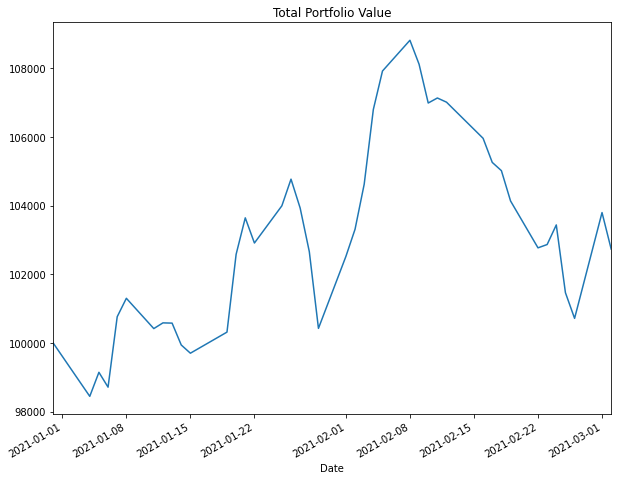

In [87]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

#portfolio value over time

Text(0.5, 1.0, 'Value of each stock with Time')

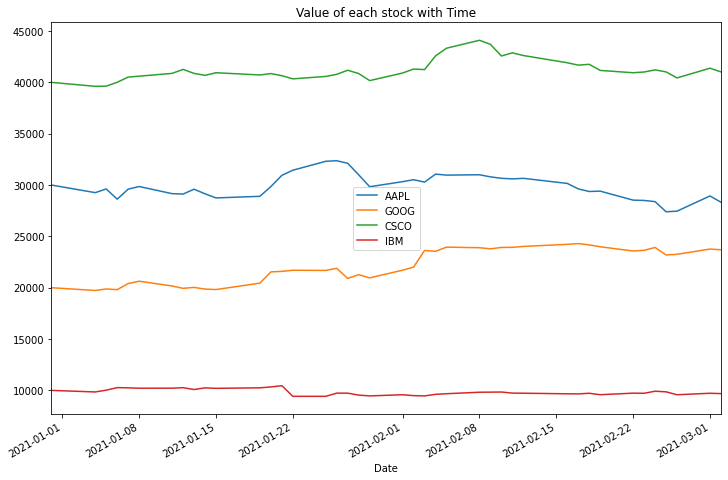

In [88]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line',figsize=(12,8))
plt.title('Value of each stock with Time')

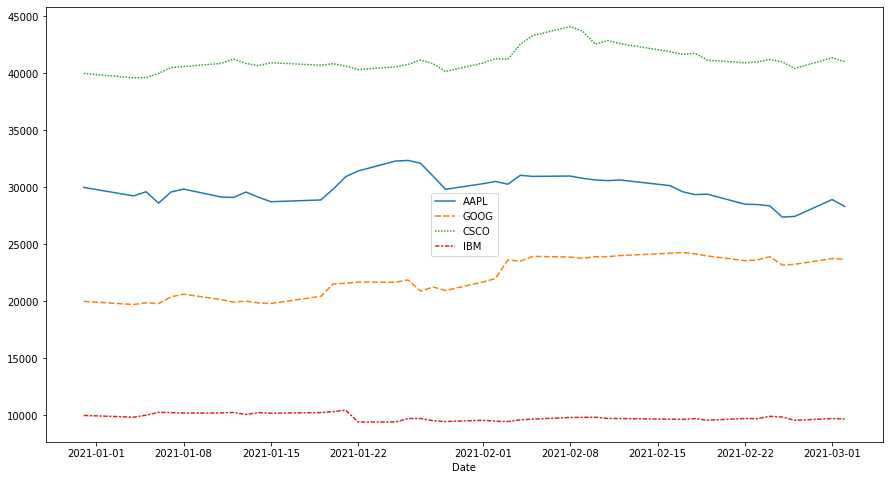

In [105]:
plt.figure(figsize=(15,8))
sns.lineplot(data=portfolio_val.drop(['Total Pos',"Daily Return"],axis=1))


# Portfolio Statistics

# Daily Returns

In [90]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

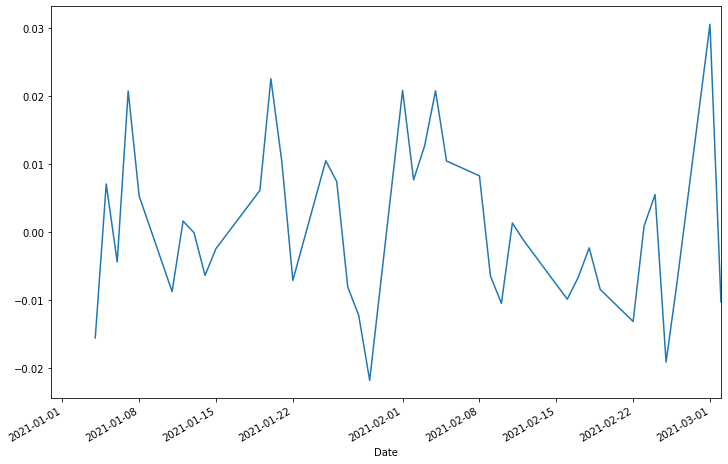

In [91]:
portfolio_val['Daily Return'].plot(figsize=(12,8))

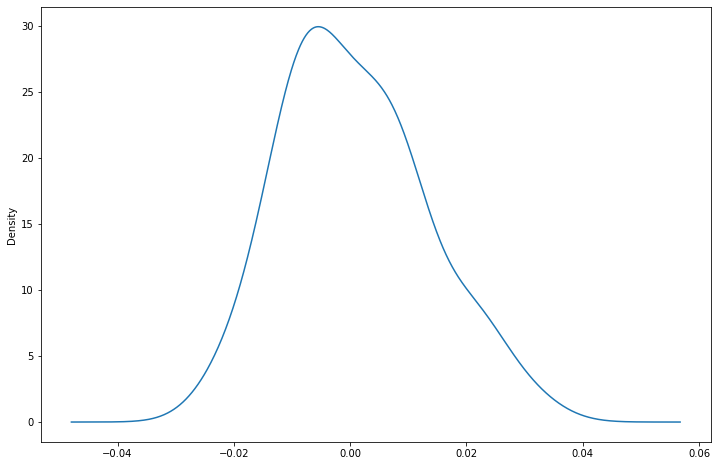

In [92]:
portfolio_val['Daily Return'].plot(kind="kde",figsize=(12,8))

The area under the +ve part is more, so we can deduce that the returns have been more in positive side.

# Avg Daily Returns

In [93]:
portfolio_val['Daily Return'].mean()

0.0007459437915842276

# Std Daily Returns

In [94]:
portfolio_val['Daily Return'].std()

0.012120812327791601

# Sharpe Ratio

The Sharpe ratio adjusts a portfolio’s past performance—or expected future performance—for the excess risk that was taken by the investor.

A high Sharpe ratio is good when compared to similar portfolios or funds with lower returns.

The Sharpe ratio has several weaknesses, including an assumption that investment returns are normally distributed.

Read more- https://www.investopedia.com/terms/s/sharperatio.asp

In [95]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [96]:
SR

0.061542392655801297

In [97]:
ASR = (252**0.5)*SR

In [98]:
ASR

0.9769551963308287

In [99]:
portfolio_val['Daily Return'].std()

0.012120812327791601

In [100]:
portfolio_val['Daily Return'].mean()

0.0007459437915842276

Text(0.5, 1.0, 'AAPL RETURNS KDE')

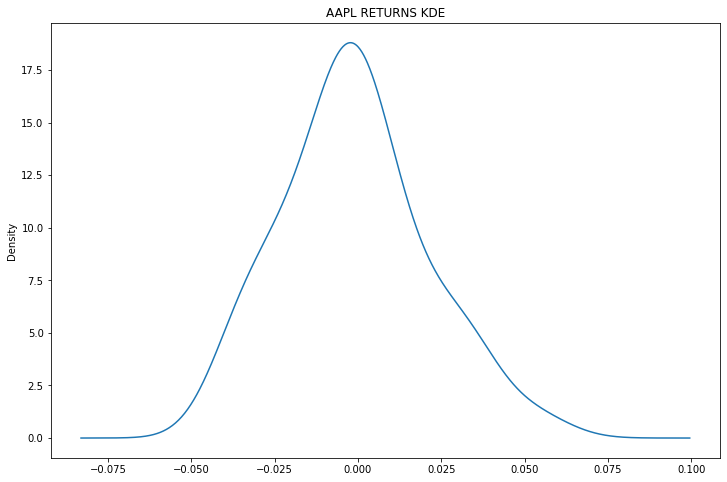

In [101]:
aapl['Adj Close'].pct_change(1).plot(kind='kde',figsize=(12,8))
plt.title("AAPL RETURNS KDE")

Text(0.5, 1.0, 'CSCO RETURNS KDE')

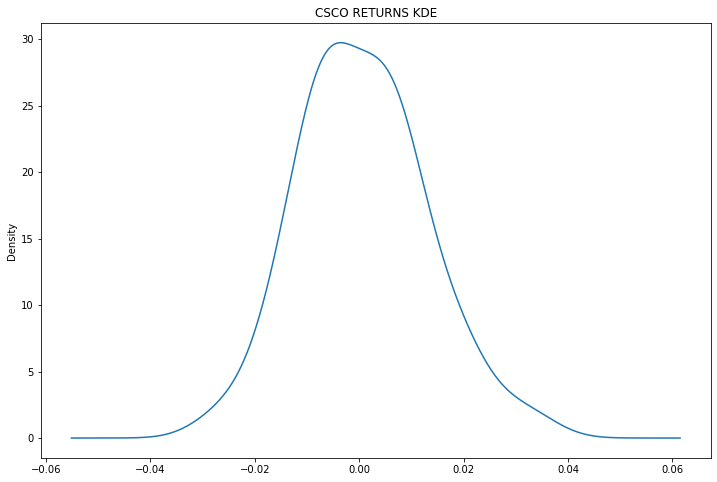

In [102]:
csco['Adj Close'].pct_change(1).plot(kind='kde',figsize=(12,8))
plt.title("CSCO RETURNS KDE")

Text(0.5, 1.0, 'GOOG RETURNS KDE')

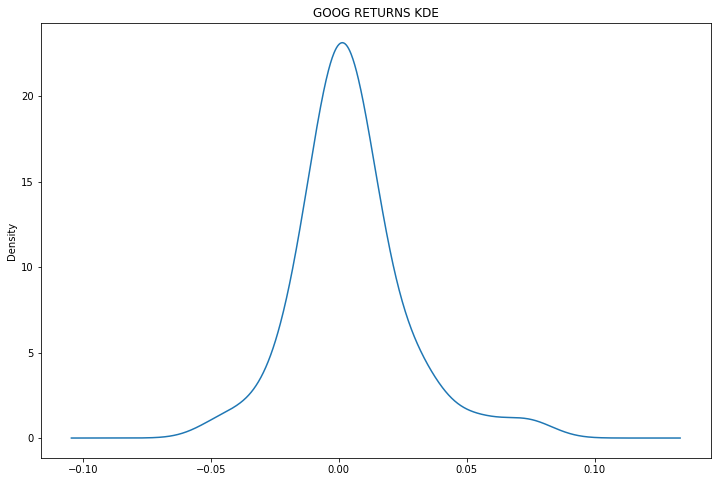

In [103]:
goog['Adj Close'].pct_change(1).plot(kind='kde',figsize=(12,8))
plt.title("GOOG RETURNS KDE")

Text(0.5, 1.0, 'IBM RETURNS KDE')

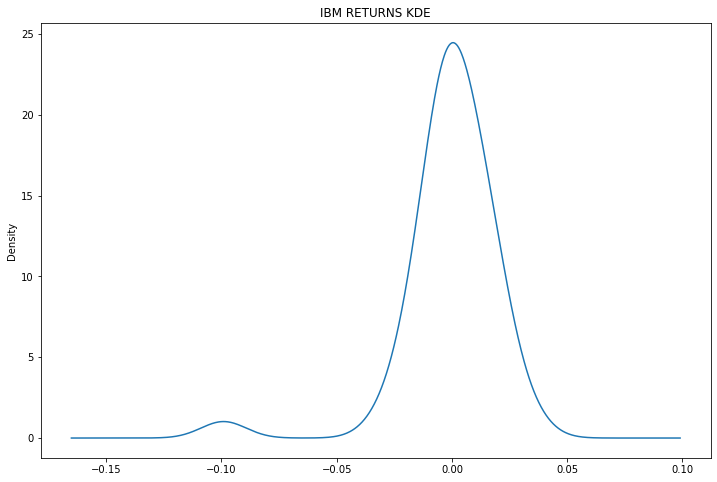

In [104]:
ibm['Adj Close'].pct_change(1).plot(kind='kde',figsize=(12,8))
plt.title("IBM RETURNS KDE")

In [106]:
portfolio_val

,AAPL,GOOG,CSCO,IBM,Total Pos,Daily Return
Date,,,,,,
2020-12-31,30000.000000,20000.000000,40000.000000,10000.000000,100000.000000,NaN
2021-01-04,29258.423100,19730.118335,39612.525063,9845.885325,98446.951823,-0.015530
2021-01-05,29620.164558,19874.877721,39630.547553,10020.655000,99146.244832,0.007103
2021-01-06,28623.105594,19810.603857,40009.012964,10270.892505,98713.614919,-0.004364
2021-01-07,29599.817897,20403.794724,40513.628928,10247.061561,100764.303109,0.020774
2021-01-08,29855.299962,20631.663766,40603.741377,10210.518241,101301.223345,0.005328
2021-01-11,29161.202060,20169.417606,40874.071849,10214.490781,100419.182296,-0.008707
2021-01-12,29120.505282,19939.151585,41261.546785,10264.538774,100585.742426,0.001659
2021-01-13,29593.035677,20028.769317,40874.071849,10082.618771,100578.495613,-0.000072
